<a href="https://colab.research.google.com/github/norayehia/ECG_signal_-healthcarewithresnet50/blob/main/99acuracyproject16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://stackoverflow.com/questions/49685924/extract-google-drive-zip-from-google-colab-notebook

In [4]:
#import cv2
import glob
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

import tensorflow.compat.v2 as tf
from keras import backend as k
from keras.applications.mobilenet import MobileNet
from keras.applications import imagenet_utils
import keras.applications
from keras.engine import training
from keras.layers import VersionAwareLayers
from keras.utils import data_utils
from keras.utils import layer_utils
from tensorflow.keras.utils import Sequence
from tensorflow.python.util.tf_export import keras_export
from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import CSVLogger
from sklearn.metrics import classification_report
import seaborn as sns

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np




import matplotlib.pyplot as plt

%matplotlib inline

get data

In [5]:
trainpath = "C:/Users/win/Downloads/datasciencecorce/4/New folder/train"
classes = ['cat', 'dog']

train_size = []

for folder_index,folder in enumerate(classes):
  train = glob.glob(trainpath + "/" + folder + "/*")
  train_size.append(len(train))

print(train_size)

[4, 4]


In [6]:
valpath = "C:/Users/win/Downloads/datasciencecorce/4/New folder/validation"
classes = ['cat', 'dog']

val_size = []

for folder_index,folder in enumerate(classes):
  val = glob.glob(valpath + "/" + folder + "/*")
  val_size.append(len(val))

print(val_size)

[4, 4]


In [7]:
testpath = "C:/Users/win/Downloads/datasciencecorce/4/New folder/test"
classes = ['cat', 'dog']
test_size = []

for folder_index,folder in enumerate(classes):
  test = glob.glob(testpath + "/" + folder + "/*")
  test_size.append(len(test))

print(test_size)

[4, 4]


In [8]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [9]:
preprocess_input= tf.keras.applications.vgg16.preprocess_input

# Dataaugmentation

https://keras.io/api/applications/#usage-examples-for-image-classification-models

In [30]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
generator = datagen.flow_from_directory(trainpath, target_size=(64, 64), batch_size=2, class_mode='categorical')

Found 8 images belonging to 2 classes.


In [31]:
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator = val_datagen.flow_from_directory(valpath,
    target_size=(64, 64), batch_size=2, class_mode='categorical') # set as validation data

Found 8 images belonging to 2 classes.


In [32]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(testpath, target_size=(64, 64), batch_size=2, class_mode='categorical',shuffle=False)

Found 8 images belonging to 2 classes.


In [33]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [34]:
# importing the libraries
from keras.models import Model
from keras.layers import Flatten, Dense
#from keras.applications import VGG16
#from keras.preprocessing import image

IMAGE_SIZE = [64, 64]  # we will keep the image size as (64,64). You can increase the size for better results. 

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset
IMAGE_SIZE = [64, 64] 
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  # input_shape = (32,32,3) as required by VGG

# this will exclude the initial layers from training phase as there are already been trained.
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
 #sigmoid (binary classification) only for classify 2 classes, e.g. Cat and Dog and softmax function(multi-class) for classify more than 2 classe
x = Dense(2,activation='sigmoid')(x)
#x = Dense(128, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
##x = Dense(6,activation='softmax')(x)
  # adding the output layer with softmax function as this is a multi label classification problem.
model = Model(inputs = vgg.input, outputs = x)

#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0   

In [36]:

history = model.fit(generator, validation_data = validation_generator, epochs = 5)

Epoch 1/5
4/4 [==============================] - 7s 1s/step - loss: 17.9094 - accuracy: 0.3750 - val_loss: 7.3865 - val_accuracy: 0.5000
Epoch 2/5
4/4 [==============================] - 3s 968ms/step - loss: 5.8818 - accuracy: 0.6250 - val_loss: 2.8654 - val_accuracy: 0.7500
Epoch 3/5
4/4 [==============================] - 4s 1s/step - loss: 1.9345 - accuracy: 1.0000 - val_loss: 1.0121 - val_accuracy: 1.0000
Epoch 4/5
4/4 [==============================] - 3s 957ms/step - loss: 1.0475 - accuracy: 1.0000 - val_loss: 0.2074 - val_accuracy: 1.0000
Epoch 5/5
4/4 [==============================] - 3s 909ms/step - loss: 6.6331e-05 - accuracy: 1.0000 - val_loss: 1.6367e-08 - val_accuracy: 1.0000


In [ ]:
#/content/drive/MyDrive/projectecg/outpvgg
model.save("C:/Users/win/Downloads/datasciencecorce/4/outpvgg")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/projectecg/outpvgg/assets


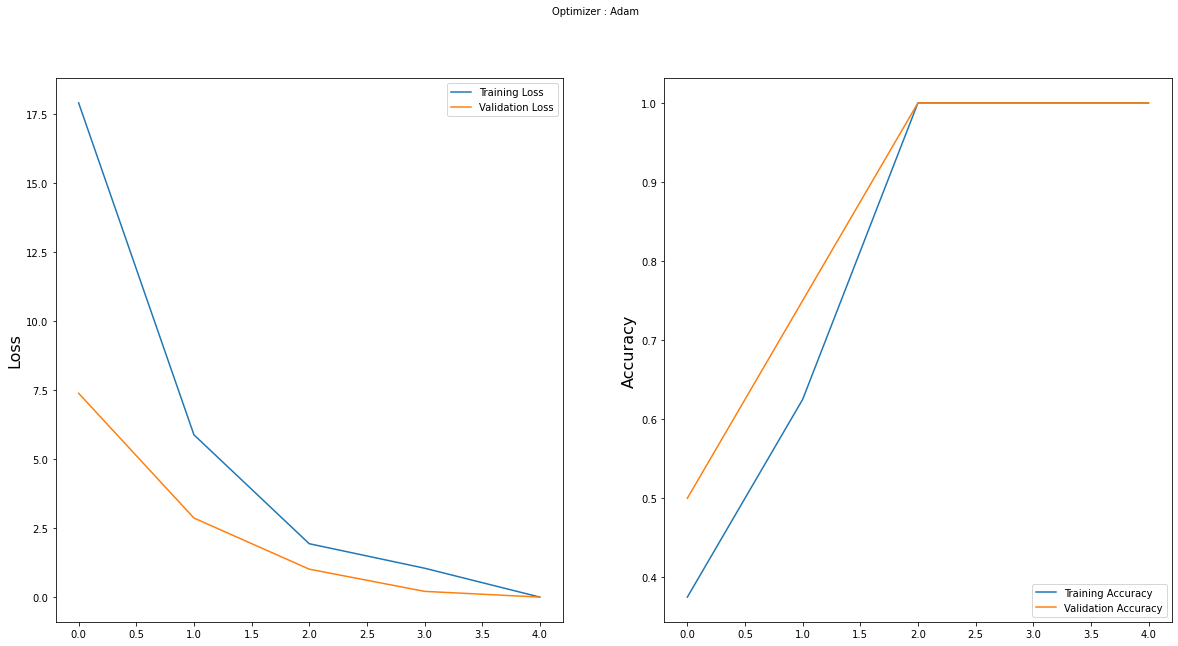

In [37]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#reconstructed_model = keras.models.load_model("/content/drive/MyDrive/my_modelv2")
model = keras.models.load_model('C:/Users/win/Downloads/datasciencecorce/4/outpvgg')

In [38]:
y_true = test_generator.classes

In [39]:
y_true

array([0, 0, 0, 0, 1, 1, 1, 1])

In [40]:
y_pred_prob = model.predict(test_generator)

In [41]:
y_pred = tf.argmax(y_pred_prob, axis=-1)

In [42]:
y_pred = y_pred.numpy()
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [43]:
print(classification_report(y_true, y_pred, target_names = classes))

              precision    recall  f1-score   support

         cat       1.00      1.00      1.00         4
         dog       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[4, 0],
       [0, 4]], dtype=int64)

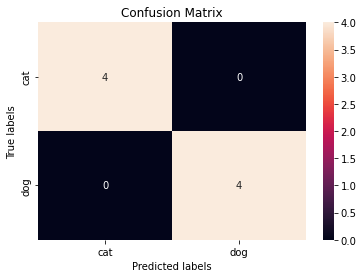

In [45]:
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);